In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

selector = 'approximate = 1 & sample = 0 & eps = 0.05 & tau = 1. & phi = .4'
path = '/home/jakob/Project_Divestment/PyDivestment/output_data/P3/micro/'
data = []
measures = ['mean', 'std']

for m in measures:
    with pd.HDFStore(path + f'{m}.h5') as store:
        data.append(store.select('dat', selector))
for d in data:
    d.index = d.index.droplevel('eps').droplevel('tau').droplevel('test').droplevel('sample').droplevel('approximate').droplevel('phi')
    d.columns = [f'${var}$' for var in d.columns]
    tvals = d.index.values
    t0 = tvals[0]
    new_times = {t: t-t0 for t in tvals}
    d.rename(mapper=new_times,
             axis='index',
             level='tstep',
             inplace=True)
    
def plotfunc(variables, colors, data, ax):
    lns = []
    for i, var in enumerate(variables):
        
        ln = ax.plot(data[0].index.values, data[0][var].values, color=colors[i], label=var)[0]
        lns.append(ln)
        upper_limit = np.transpose(data[0][[var]].values \
                                   + data[1][[var]].values)[0]
        lower_limit = np.transpose(data[0][[var]].values \
                                   - data[1][[var]].values)[0]
        ax.fill_between(data[0].index.values,
                                 upper_limit, lower_limit,
                                 color='k',
                                 alpha=0.05)
        ax.plot(data[0].index.values,
                                 upper_limit,
                                 color=colors[i],
                                 alpha=0.2)
        ax.plot(data[0].index.values,
                                 lower_limit,
                                 color=colors[i],
                                 alpha=0.2)
        ax.set_xlim([0, 900])
    print(lns)
    return lns

[<matplotlib.lines.Line2D object at 0x7f8633d453c8>, <matplotlib.lines.Line2D object at 0x7f8633d5f908>]
[<matplotlib.lines.Line2D object at 0x7f862e41def0>, <matplotlib.lines.Line2D object at 0x7f86601dc320>]


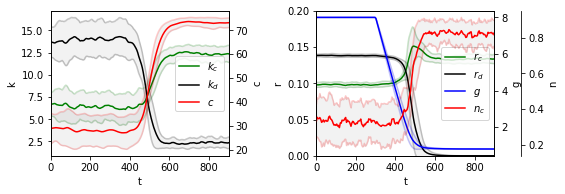

In [6]:
colors = ['g', 'k']
variables = ['$k_c$', '$k_d$']

fig = plt.figure(figsize=(8, 2.8))
ax = fig.add_subplot(121)

lns1 = plotfunc(variables, colors, data, ax)

axb = ax.twinx()

lns2 = plotfunc(['$c$'], ['r'], data, axb)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='center right')

ax2 = fig.add_subplot(122)

lns3 = plotfunc(variables=['$r_c$', '$r_d$'], 
                colors=['g', 'k'], data=data, ax=ax2)
ax2.set_ylim([0., 0.2])

ax2b = ax2.twinx()

lns4 = plotfunc(variables=['$g$'],
                colors=['b'], data=data, ax=ax2b)

ax2c = ax2.twinx()
ax2c.spines["right"].set_position(("axes", 1.15))

lns5 = plotfunc(variables=['$n_c$'],
                colors=['r'], data=data, ax=ax2c)

lns = lns3+lns4+lns5
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc='center right')

ax.set_ylabel('k')
axb.set_ylabel('c')
ax2.set_ylabel('r')
ax2b.set_ylabel('g')
ax2c.set_ylabel('n')
ax.set_xlabel('t')
ax2.set_xlabel('t')


plt.tight_layout()
fig.savefig('example_trajectory.pdf')

In [3]:
data[0].head()

,$c$,$g$,$mu_c^c$,$mu_c^d$,$mu_d^c$,$mu_d^d$,$time$,$x$,$y$,$z$,...,$i_c$,$k_c$,$k_d$,$l_c$,$l_d$,$n_c$,$r$,$r_c$,$r_d$,$w$
tstep,,,,,,,,,,,,,,,,,,,,,
0.0,28.947747,7.999999,9.869697,5.030318,10.351419,15.426319,1000.0,-0.339364,-0.337007,0.323030,...,0.321196,6.627644,13.747723,0.314232,0.685768,0.330318,0.038378,0.098003,0.138411,2.766496
4.5,28.944319,7.999999,9.834646,4.937742,10.359083,15.532098,1004.5,-0.292285,-0.291853,0.329187,...,0.344182,6.672083,13.703496,0.315839,0.684161,0.353857,0.038272,0.097887,0.138456,2.765565
9.0,28.987691,7.999999,9.891497,5.006418,10.274701,15.474704,1009.0,-0.305971,-0.302582,0.330800,...,0.337133,6.717325,13.654559,0.317736,0.682264,0.347014,0.038150,0.097847,0.138509,2.764504
13.5,29.047519,7.999999,9.913134,5.017960,10.282304,15.445450,1013.5,-0.308659,-0.306013,0.325473,...,0.336061,6.730692,13.636511,0.318484,0.681516,0.345671,0.038104,0.097941,0.138534,2.764019
18.0,29.111464,7.999999,9.977654,5.018127,10.173547,15.464346,1018.0,-0.294795,-0.300473,0.319302,...,0.342652,6.765863,13.595770,0.320215,0.679785,0.352602,0.037998,0.097985,0.138584,2.763077
